In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Step 1: Load Dataset
data = pd.read_csv("Churn_Modelling.csv")
print("✅ Dataset Loaded Successfully")
print(data.head())

✅ Dataset Loaded Successfully
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93

In [3]:
# Step 2: Select Features and Target
X = data[['CreditScore','Geography','Gender','Age','Tenure','Balance',
          'NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
y = data['Exited']

In [4]:
# Step 3: Encode Categorical Columns
X = X.copy()
le_geo = LabelEncoder()
le_gender = LabelEncoder()
X['Geography'] = le_geo.fit_transform(X['Geography'])
X['Gender'] = le_gender.fit_transform(X['Gender'])

In [5]:
# Step 4: Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)


In [6]:
# Step 5: Normalize Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Step 6: Build ANN Model
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Step 7: Train Model
model.fit(X_train, y_train,
          epochs=100,
          batch_size=32,
          validation_split=0.2,
          class_weight={0:1, 1:3},  # give more importance to churners
          verbose=0)

In [18]:
# Step 8: Predict
y_pred = (model.predict(X_test) > 0.55).astype(int)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step



=== Model Evaluation ===
Accuracy: 81.80%
Precision: 0.528
Recall: 0.684
F1 Score: 0.596

Confusion Matrix:
 [[1367  240]
 [ 124  269]]


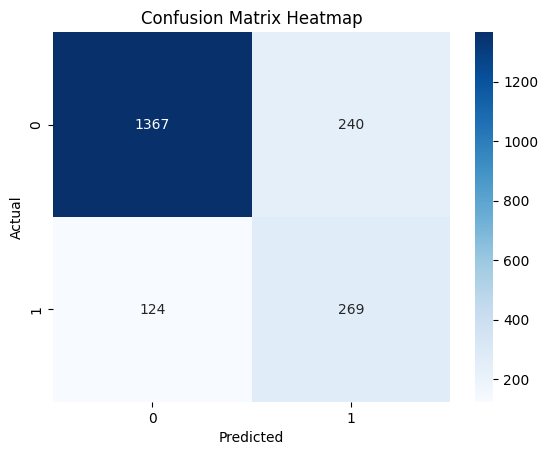

In [19]:
# Step 9: Evaluate Model
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("\n=== Model Evaluation ===")
print(f"Accuracy: {acc*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")

print("\nConfusion Matrix:\n", cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()